# SENTIMENT ANALYSIS AMAZON REVIEWS

## Problem statement

El problema se centra en analizar las opiniones y comentarios de los usuarios sobre diferentes productos mencionados en las reseñas. El objetivo principal es extraer información relevante de las opiniones verificadas y retroalimentación proporcionada por los usuarios para determinar la calidad de los productos.

## Descripción del dataset

- El conjunto de datos proporciona una visión general de cómo se califican los productos mencionados en Amazon Alexa, junto con las opiniones verificadas y retroalimentación de los usuarios.
- Se basa en reseñas de productos, donde se ofrecen sugerencias y comentarios de acuerdo con la calidad del producto.
- Las reseñas abarcan diferentes productos como tela de carbón, tela de nogal, tela gris para calentador, entre otros, con sus respectivas calificaciones.

## Objetivos del proyecto

- Analizar las opiniones y comentarios de los usuarios para evaluar la calidad de los productos.
- Utilizar técnicas de Machine Learning para clasificar las opiniones como positivas, negativas o neutrales.
- Extraer información útil de las retroalimentaciones de los usuarios para mejorar la comprensión de las preferencias y percepciones de los clientes.

### Importar paquetes y librerias

In [7]:
# Preparación de datos y visualización
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import nltk

# Descargar Stopwords
nltk.download('stopwords')


# Preprocesamiento de texto y limpieza
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')

# Inicializar Stemmer
stemmer = PorterStemmer()

# Definir Stopwords
STOPWORDS = set(stopwords.words('english'))


# División de datos y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extracción de características y transformación
from sklearn.feature_extraction.text import CountVectorizer


# Validación cruzada y ajuste de parámetros
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Clasificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Métricas y visualización de resultados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pickle
import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## EDA

In [10]:
#Load the data

data = pd.read_csv("../../data/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [15]:
from skimpy import skim

skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3150   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ rating            │    0 │       0 │     4.5 │     1.1 │    1 │     4 │     5 │     5 │       5 │  ▁  ▁▂▇  │  │
│ │ feedback          │    0 │       0 │    0.92 │    0.27 │    0 │     1 │     1 │     1 │       1 │  ▁    ▇  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date                             │      0 │         0 │                          1 │                  3150 │  │
│ │ variation                        │      0 │         0 │                        2.9 │                  9253 │  │
│ │ verified_reviews                 │      1 │      0.03 │                         26 │                 81106 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

* Hay presencia de un dato nulo en la columna "verified_reviews"

In [16]:
#Getting the record where 'verified_reviews' is null 
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [17]:
#We will drop the null record
data.dropna(inplace=True)

In [18]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


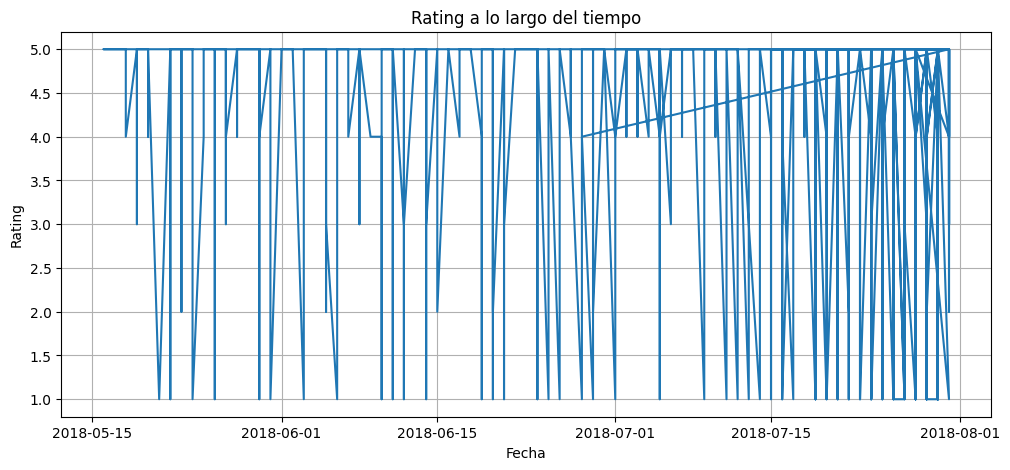

In [30]:
df = data.copy()

# Suponiendo que df es tu DataFrame
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Graficar el rating a lo largo del tiempo
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['rating'])
plt.title('Rating a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

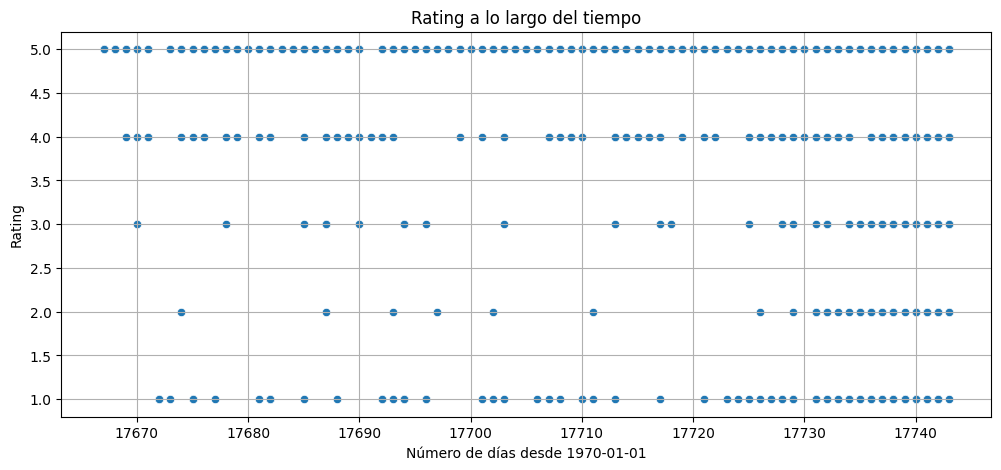

In [28]:
df = data.copy()

# Suponiendo que df es tu DataFrame
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Convertir la columna 'date' a un valor numérico
df['date_num'] = (df['date'] - pd.Timestamp('1970-01-01')).dt.days

# Graficar el rating a lo largo del tiempo usando un gráfico de dispersión
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['date_num'], y=df['rating'])
plt.title('Rating a lo largo del tiempo')
plt.xlabel('Número de días desde 1970-01-01')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [31]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [32]:
#Randomly checking for 10th record
print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [33]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

### Analyzing 'rating' column

In [34]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


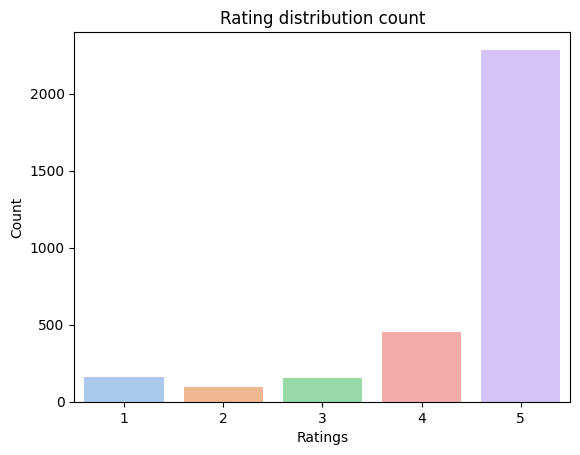

In [51]:
# Get the unique rating categories
unique_ratings = data['rating'].unique()

# Define pastel colors based on the number of unique ratings
pastel_colors = sns.color_palette("pastel", len(unique_ratings))

# Create countplot with pastel colors
ax = sns.countplot(x=data['rating'], hue=data['rating'], palette=pastel_colors, legend=False)

# Set plot title
plt.title('Rating distribution count')

# Set x and y labels
plt.xlabel('Ratings')
plt.ylabel('Count')

# Show plot
plt.show()

In [52]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


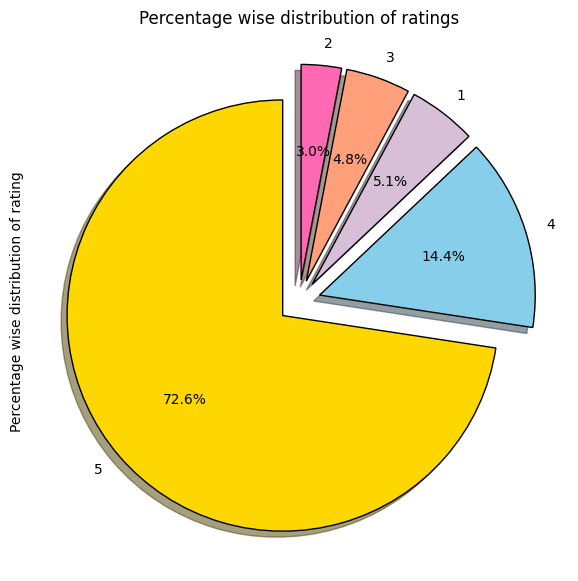

In [54]:
import matplotlib.pyplot as plt

# Define pastel colors
pastel_colors = ['#FFD700', '#87CEEB', '#D8BFD8', '#FFA07A', '#FF69B4']
tags = data['rating'].value_counts()/data.shape[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Define explode values for each slice
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Plot the pie chart with pastel colors and other customizations
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=pastel_colors, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, explode=explode, label='Percentage wise distribution of rating', ax=ax)

# Set title
plt.title('Percentage wise distribution of ratings')

# Save the plot to a BytesIO object
# from io import BytesIO
# graph = BytesIO()
# fig.savefig(graph, format="png")

# Show the plot
plt.show()

### Analyzing 'feedback' column

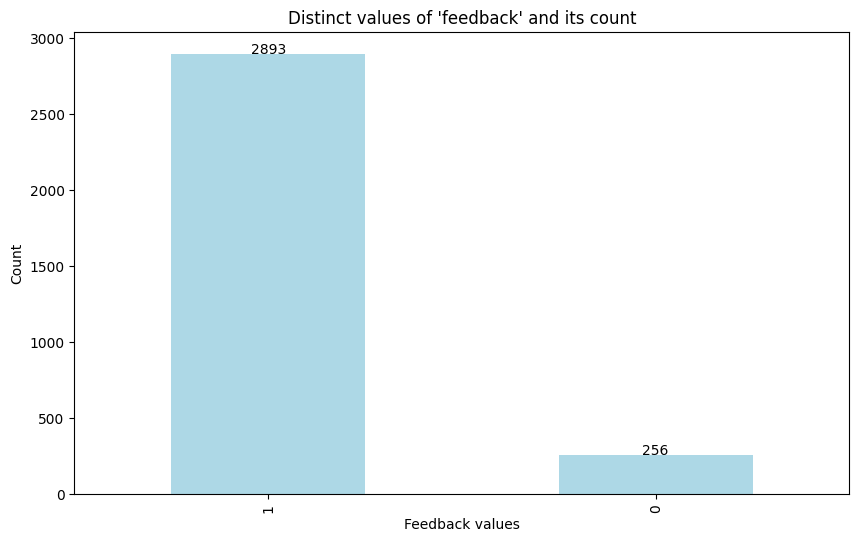

In [56]:
import matplotlib.pyplot as plt

# Distinct values of 'feedback' and its count
counts = data['feedback'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', color='lightblue')

# Add text labels at the top of each bar
for i, v in enumerate(counts.values):
    ax.text(i, v + 0.5, str(v), ha='center')

# Set title and labels
plt.title('Distinct values of \'feedback\' and its count')
plt.xlabel('Feedback values')
plt.ylabel('Count')

# Show the plot
plt.show()

In [57]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [58]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


In [59]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

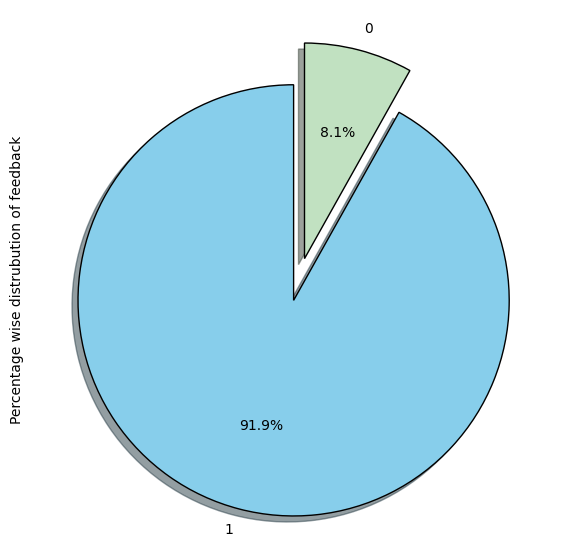

In [61]:
fig = plt.figure(figsize=(7,7))

colors = ('#87CEEB', '#C1E1C1')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [62]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [63]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

* Para cuando el rating es >= 3, entonces el feedback es 1 (positivo), caso contrario es 0 (negativo).

### Analyzing 'variation' column

In [64]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

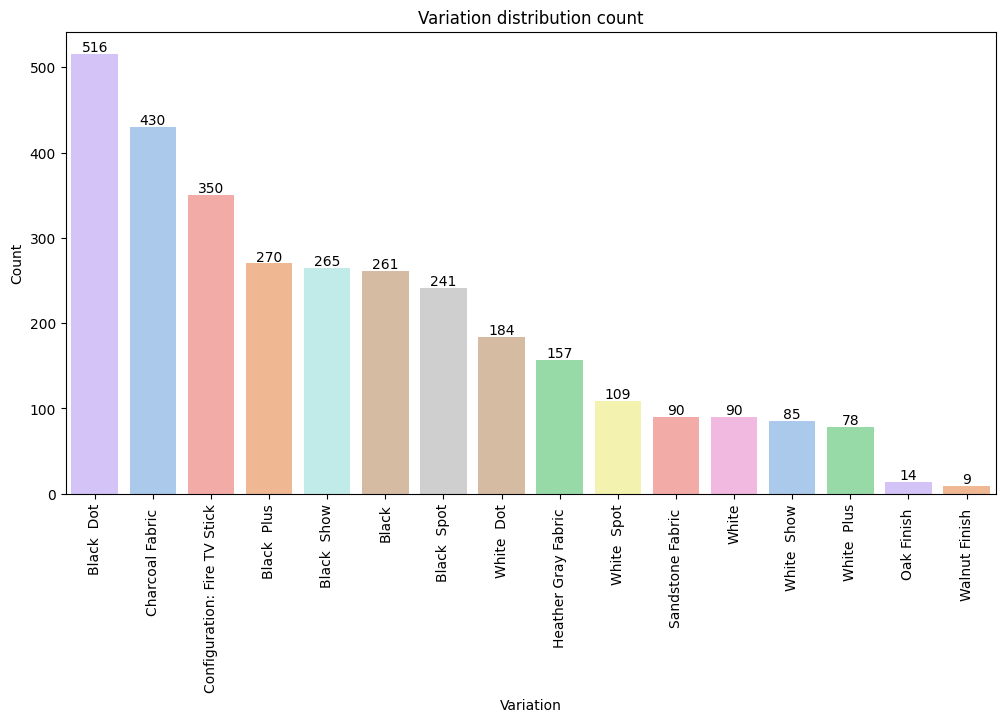

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las variaciones únicas y contar su frecuencia
variation_counts = data['variation'].value_counts()

# Ordenar las variaciones de mayor a menor frecuencia
variation_counts = variation_counts.sort_values(ascending=False)

# Definir la paleta de colores pastel
pastel_colors = sns.color_palette("pastel", len(variation_counts))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=data['variation'], hue=data['variation'], palette=pastel_colors, order=variation_counts.index, legend=False)
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Agregar los valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

plt.show()

In [77]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [78]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

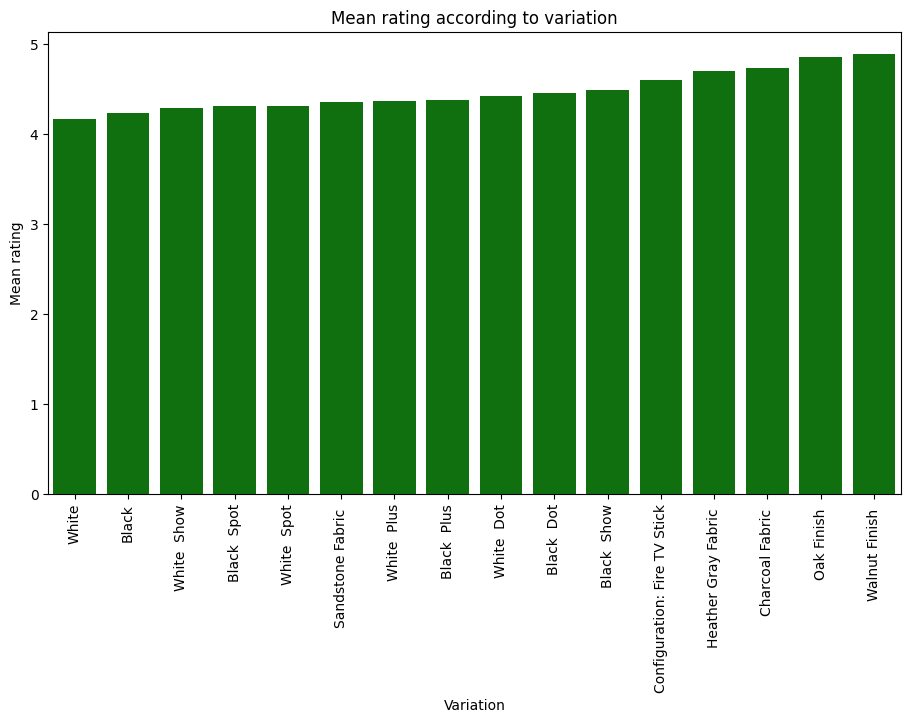

In [82]:

# Group the data by 'variation' and calculate the mean rating
mean_ratings = data.groupby('variation')['rating'].mean().sort_values()

# Create a new figure with the specified size
plt.figure(figsize=(11, 6))

# Create the bar plot using seaborn
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, color='green')

# Set the plot title, x-axis label, and y-axis label
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Analyzing 'verified_reviews' column

In [83]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

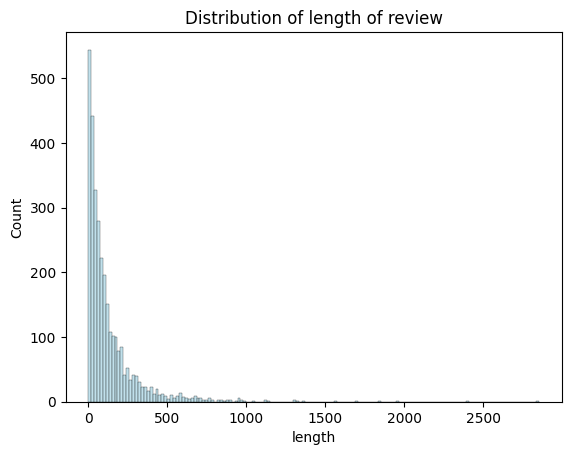

In [84]:
sns.histplot(data['length'], color='#ADD8E6')
plt.gca().set_title('Distribution of length of review')
plt.show()

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

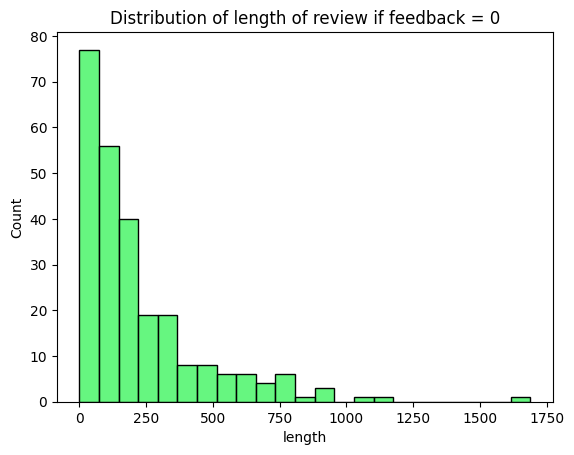

In [85]:
sns.histplot(data[data['feedback']==0]['length'],color='#33f456').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

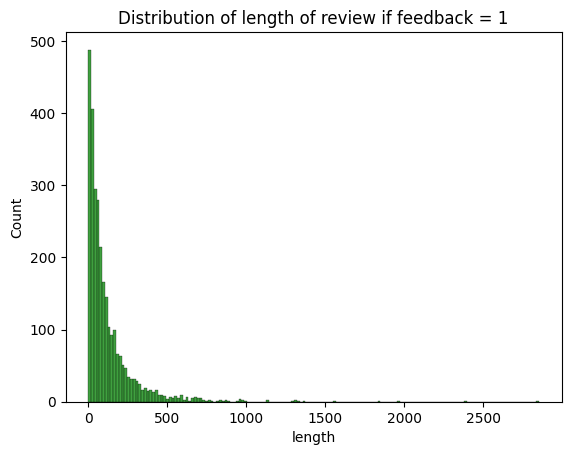

In [86]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

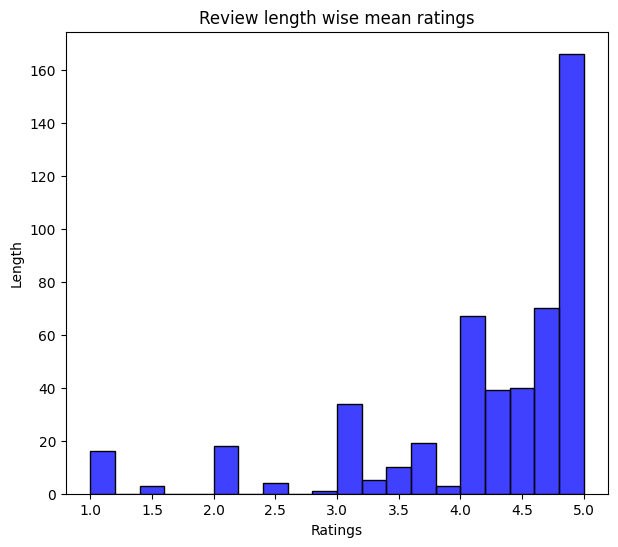

In [88]:
# Group the data by 'length' and calculate the mean rating
mean_ratings_by_length = data.groupby('length')['rating'].mean()

# Create the histogram plot using Seaborn
plt.figure(figsize=(7, 6))
sns.histplot(mean_ratings_by_length, color='blue', bins=20)

# Set the plot title, x-axis label, and y-axis label
plt.title("Review length wise mean ratings")
plt.xlabel('Ratings')
plt.ylabel('Length')

# Show the plot
plt.show()

In [89]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

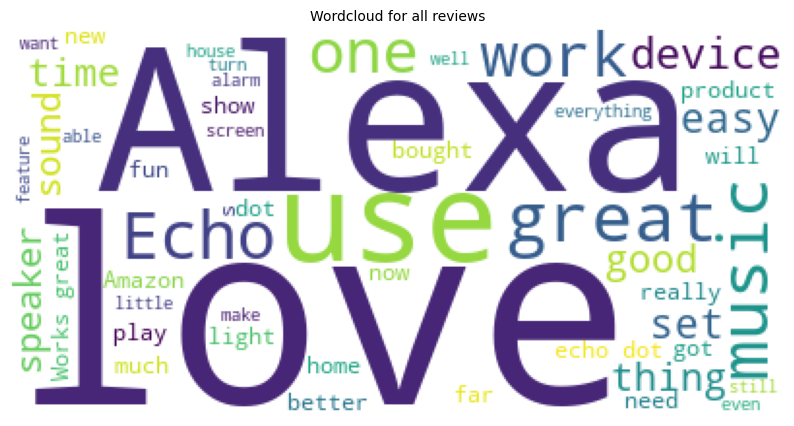

In [92]:
from wordcloud import WordCloud

# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()